# 1.	Import all the crucial Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# 2.Loading & Merging of Data sets.

In [2]:
centers_data = pd.read_csv('fulfilment_center_info.csv')

In [3]:
meal_data = pd.read_csv('meal_info.csv')

In [4]:
train_data = pd.read_csv('train.csv')

In [5]:
test_data = pd.read_csv('test.csv')

### MERGE ORIGINAL TRAIN DATA WITH CENTER AND MEAL DATA

In [6]:
full_train = pd.merge(train_data, meal_data, on='meal_id', how='left')
full_train = pd.merge(full_train, centers_data, on='center_id', how='left')

In [7]:
full_train.shape

(456548, 15)

In [8]:
full_test = pd.merge(test_data, meal_data, on='meal_id', how='left')
full_test = pd.merge(full_test, centers_data, on='center_id', how='left')

In [9]:
full_test.shape

(32573, 14)

In [10]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [11]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
category                 32573 non-null object
cuisine                  32573 non-null object
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ MB


### DROPPING OF UNIMPORTANT COLUMNS

In [12]:
full_train=full_train.drop(['center_id','meal_id'],axis=1)
full_test=full_test.drop(['center_id','meal_id'],axis=1)

In [13]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 13 columns):
id                       456548 non-null int64
week                     456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 48.8+ MB


In [14]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 12 columns):
id                       32573 non-null int64
week                     32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
category                 32573 non-null object
cuisine                  32573 non-null object
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 3.2+ MB


# 3.Identifying and handling the missing values

In [15]:
full_train.isna().sum()

id                       0
week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [16]:
full_test.isna().sum()

id                       0
week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

# 4.Encoding the categorical data

In [17]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 13 columns):
id                       456548 non-null int64
week                     456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 48.8+ MB


In [18]:
full_train.category.value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [19]:
full_train.cuisine .value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

In [20]:
full_train.center_type.value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

In [21]:

full_train.shape

(456548, 13)

In [22]:
category=pd.get_dummies(full_train.category)
cuisine=pd.get_dummies(full_train.cuisine)
center=pd.get_dummies(full_train.center_type)

In [23]:
full_train.shape

(456548, 13)

In [24]:
full_train=pd.concat([full_train,category,cuisine,center],axis=1)
full_train=full_train.drop(['category','cuisine','center_type'],axis=1)


In [25]:
full_train.shape

(456548, 31)

In [26]:
full_train

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai,TYPE_A,TYPE_B,TYPE_C
0,1379560,1,136.83,152.29,0,0,177,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1466964,1,136.83,135.83,0,0,270,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1346989,1,134.86,135.86,0,0,189,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1338232,1,339.50,437.53,0,0,54,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1448490,1,243.50,242.50,0,0,40,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,484.09,484.09,0,0,68,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
456544,1062036,145,482.09,482.09,0,0,42,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
456545,1110849,145,237.68,321.07,0,0,501,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
456546,1147725,145,243.50,313.34,0,0,729,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [27]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 31 columns):
id                       456548 non-null int64
week                     456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
op_area                  456548 non-null float64
Beverages                456548 non-null uint8
Biryani                  456548 non-null uint8
Desert                   456548 non-null uint8
Extras                   456548 non-null uint8
Fish                     456548 non-null uint8
Other Snacks             456548 non-null uint8
Pasta                    456548 non-null uint8
Pizza                    456548 non-null uint8
Rice Bowl                456548 non-n

In [28]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 12 columns):
id                       32573 non-null int64
week                     32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
category                 32573 non-null object
cuisine                  32573 non-null object
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 3.2+ MB


In [29]:
category=pd.get_dummies(full_test.category)
cuisine=pd.get_dummies(full_test.cuisine)
center=pd.get_dummies(full_test.center_type)

In [30]:
full_test.shape

(32573, 12)

In [31]:
full_test=pd.concat([full_test,category,cuisine,center],axis=1)
full_test=full_test.drop(['category','cuisine','center_type'],axis=1)


In [32]:
full_test.shape

(32573, 30)

In [33]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 30 columns):
id                       32573 non-null int64
week                     32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
city_code                32573 non-null int64
region_code              32573 non-null int64
op_area                  32573 non-null float64
Beverages                32573 non-null uint8
Biryani                  32573 non-null uint8
Desert                   32573 non-null uint8
Extras                   32573 non-null uint8
Fish                     32573 non-null uint8
Other Snacks             32573 non-null uint8
Pasta                    32573 non-null uint8
Pizza                    32573 non-null uint8
Rice Bowl                32573 non-null uint8
Salad                    32573 non-null uint8
Sandwich   

# 5.Splitting the dataset

### DEFINING X_train, Y_train, X_test and Y_test

In [34]:
full_train.shape

(456548, 31)

In [35]:
train = full_train[full_train['week'] <= 130].copy()
val   = full_train[(full_train['week'] >= 131) & (full_train['week'] <= 140)].copy()
test  = full_train[(full_train['week'] >= 141) & (full_train
                                                  ['week'] <= 145)].copy()

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407243 entries, 0 to 407242
Data columns (total 31 columns):
id                       407243 non-null int64
week                     407243 non-null int64
checkout_price           407243 non-null float64
base_price               407243 non-null float64
emailer_for_promotion    407243 non-null int64
homepage_featured        407243 non-null int64
num_orders               407243 non-null int64
city_code                407243 non-null int64
region_code              407243 non-null int64
op_area                  407243 non-null float64
Beverages                407243 non-null uint8
Biryani                  407243 non-null uint8
Desert                   407243 non-null uint8
Extras                   407243 non-null uint8
Fish                     407243 non-null uint8
Other Snacks             407243 non-null uint8
Pasta                    407243 non-null uint8
Pizza                    407243 non-null uint8
Rice Bowl                407243 non-n

In [37]:
val.shape

(32929, 31)

In [38]:
test.shape

(16376, 31)

In [39]:
X_train=val.drop(['id','num_orders','week'],axis=1)
Y_train=np.log(val['num_orders']) #Applying Log Transformation on the Target Feature

X_test=val.drop(['id','num_orders','week'],axis=1)
Y_test=np.log(val['num_orders']) #Applying Log Transformation on the Target Feature


In [40]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32929 entries, 407243 to 440171
Data columns (total 31 columns):
id                       32929 non-null int64
week                     32929 non-null int64
checkout_price           32929 non-null float64
base_price               32929 non-null float64
emailer_for_promotion    32929 non-null int64
homepage_featured        32929 non-null int64
num_orders               32929 non-null int64
city_code                32929 non-null int64
region_code              32929 non-null int64
op_area                  32929 non-null float64
Beverages                32929 non-null uint8
Biryani                  32929 non-null uint8
Desert                   32929 non-null uint8
Extras                   32929 non-null uint8
Fish                     32929 non-null uint8
Other Snacks             32929 non-null uint8
Pasta                    32929 non-null uint8
Pizza                    32929 non-null uint8
Rice Bowl                32929 non-null uint8
Salad

In [41]:
X_train.shape

(32929, 28)

In [42]:
Y_train.shape

(32929,)

In [43]:
full_train.describe()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai,TYPE_A,TYPE_B,TYPE_C
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,0.280124,0.045152,0.064164,0.029706,0.022313,0.064350,0.060660,0.072584,0.073175,0.062554,0.072919,0.058955,0.027763,0.065581,0.225157,0.246660,0.269249,0.258934,0.575801,0.206055,0.218144
std,1.443548e+05,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,0.449060,0.207637,0.245045,0.169774,0.147700,0.245376,0.238705,0.259452,0.260424,0.242160,0.260004,0.235542,0.164292,0.247549,0.417686,0.431067,0.443570,0.438050,0.494221,0.404471,0.412986
min,1.000000e+06,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.124999e+06,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.250184e+06,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.375140e+06,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.499999e+06,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. PREDCTlNG THE MODELS

## 1 - LlNEAR REGRESSlON

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
le = LinearRegression()

In [46]:
le.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
Y_pred = le.predict(X_test)
from sklearn import metrics
print('RMSE:',100*np.sqrt(metrics.mean_squared_log_error(Y_test, Y_pred)))

RMSE: 12.973809601845499


## 2.   XGB

In [48]:
xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

In [49]:
xgb.fit(X_train,Y_train)

[16:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4, silent=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [50]:
Y_pred = xgb.predict(X_test)
from sklearn import metrics
print('RMSE:',100*np.sqrt(metrics.mean_squared_log_error(Y_test, Y_pred)))

RMSE: 6.748892273383227


## CatBoostRegressor

In [51]:
from catboost import CatBoostRegressor
CGB=CatBoostRegressor(learning_rate=0.3,loss_function='RMSE',max_depth=9,verbose=False)

CGB.fit(X_train, Y_train)
CGBpred=CGB.predict(X_test)
print('RMSE:',100*np.sqrt(metrics.mean_squared_log_error(Y_test, Y_pred)))

RMSE: 6.748892273383227


# 7.Feature Engineering

### PLOTS/GRAPHS

In [52]:
full_train.columns

Index(['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'op_area', 'Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters', 'Continental', 'Indian', 'Italian',
       'Thai', 'TYPE_A', 'TYPE_B', 'TYPE_C'],
      dtype='object')

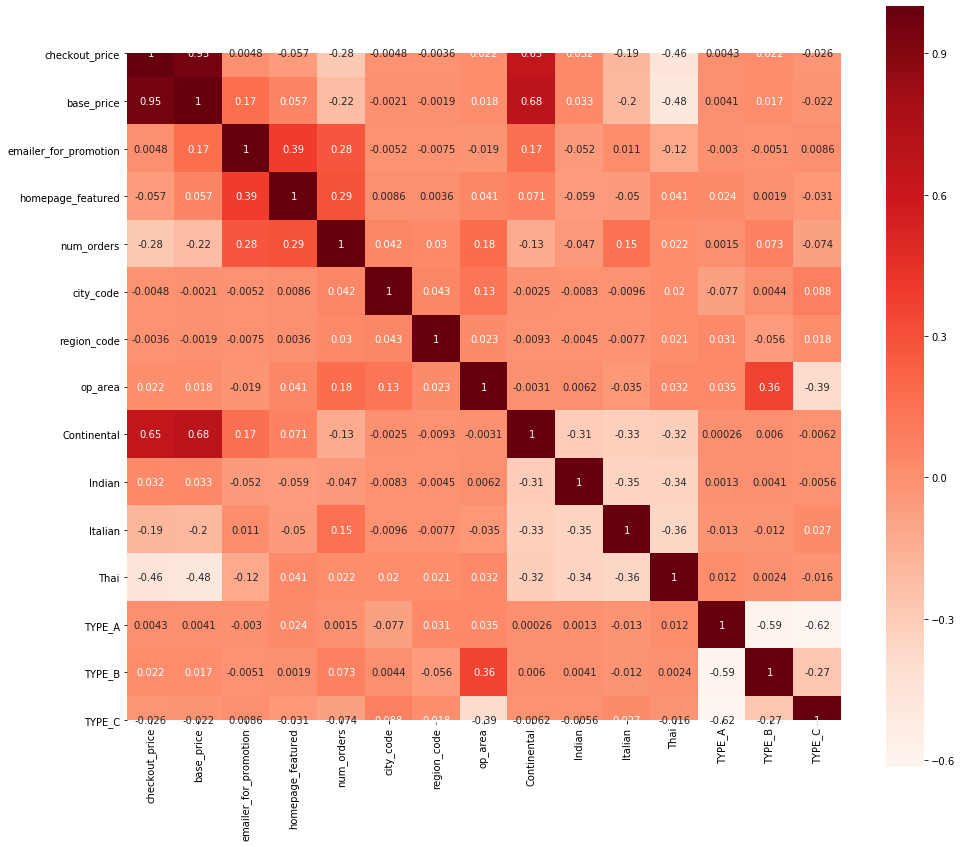

In [53]:
plt.figure(figsize=(16,14))
plot_data1=full_train
sns.heatmap(plot_data1.drop(['id', 'week','Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters'],axis=1).corr(),annot=True, square=True, cmap='Reds')

In [54]:
#Correlation with output variable
plot_data1_target = abs(plot_data1['num_orders'])
#Selecting highly correlated features
relevant_features = plot_data1_target[plot_data1_target>0.5]
relevant_features

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

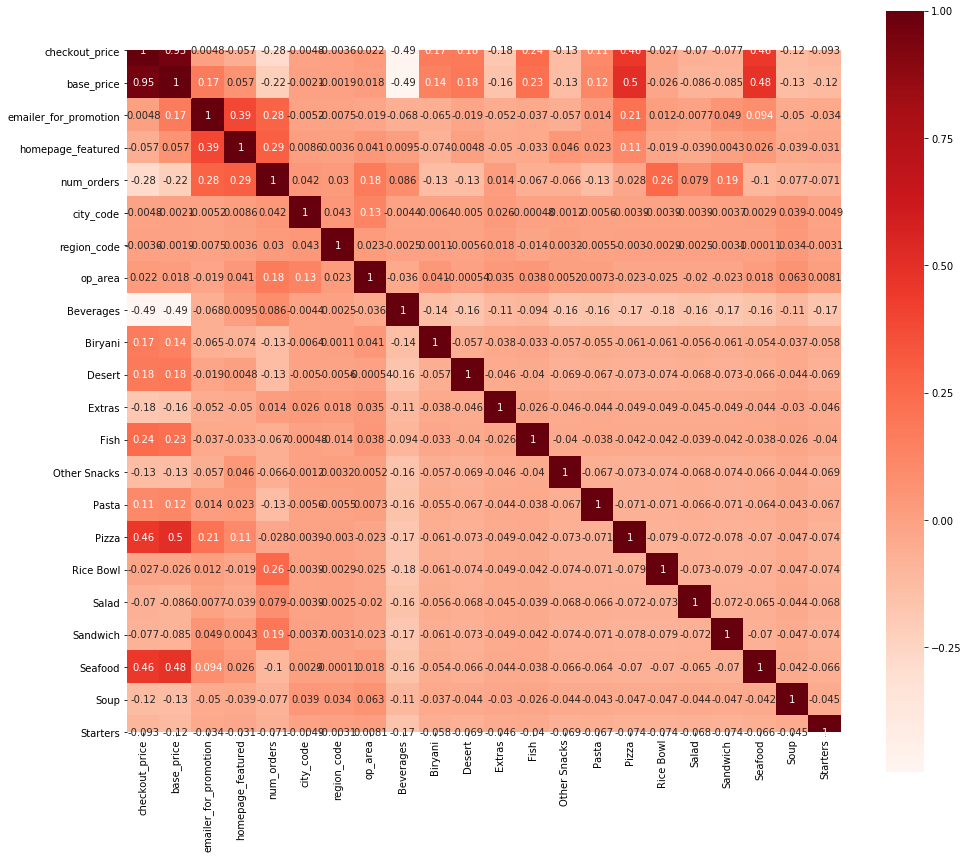

In [55]:
plt.figure(figsize=(16,14))
plot_data1=full_train
sns.heatmap(plot_data1.drop(['id', 'week','Continental', 'Indian', 'Italian',
       'Thai', 'TYPE_A', 'TYPE_B', 'TYPE_C'],axis=1).corr(),annot=True, square=True, cmap='Reds')

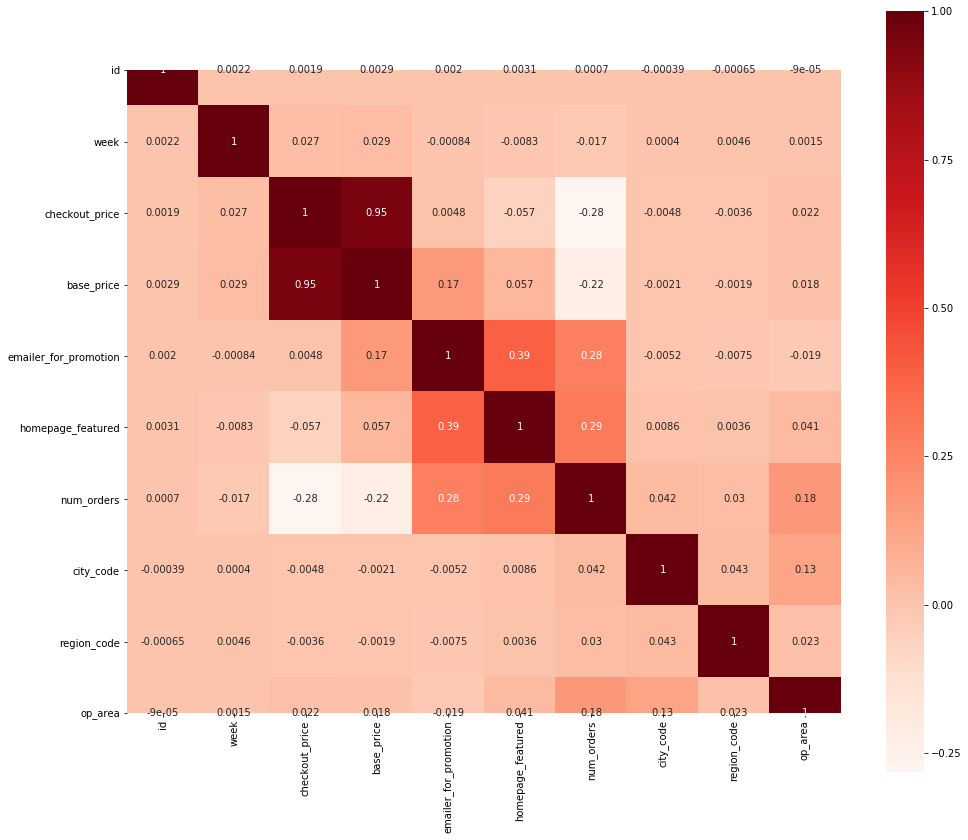

In [56]:
plt.figure(figsize=(16,14))
plot_data1=full_train
sns.heatmap(plot_data1.drop(['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters', 'Continental', 'Indian', 'Italian',
       'Thai', 'TYPE_A', 'TYPE_B', 'TYPE_C'],axis=1).corr(),annot=True, square=True, cmap='Reds')

In [57]:
data_tr=full_train
data_te=full_test

### FEATURE Scaling

In [58]:
full_train=data_tr
full_test=data_te

full_train['dff_cost']=full_train['base_price']-full_train['checkout_price']
full_test['dff_cost']=full_test['base_price']-full_test['checkout_price']

In [59]:
full_train['marketing']=full_train['emailer_for_promotion']+full_train['homepage_featured']
full_test['marketing']=full_test['emailer_for_promotion']+full_test['homepage_featured']

In [60]:
full_train['total_cost']=full_train['base_price']+full_train['checkout_price']
full_test['total_cost']=full_test['base_price']+full_test['checkout_price']

In [61]:
full_train=full_train.drop(['emailer_for_promotion','homepage_featured'],axis=1)
full_test=full_test.drop(['emailer_for_promotion','homepage_featured'],axis=1)

full_train=full_train.drop(['base_price','checkout_price'],axis=1)
full_test=full_test.drop(['base_price','checkout_price'],axis=1)

In [62]:
full_train['dish_sum']=full_train[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].sum(axis=1)

full_test['dish_sum']=full_test[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].sum(axis=1)

In [63]:
full_train['dish_mean']=full_train[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].mean(axis=1)

full_test['dish_mean']=full_test[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].mean(axis=1)

In [64]:
full_train['dish_skew']=full_train[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].skew(axis=1)

full_test['dish_skew']=full_test[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].skew(axis=1)

In [65]:
full_train['dish_kurt']=full_train[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].kurt(axis=1)

full_test['dish_kurt']=full_test[['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters']].kurt(axis=1)

In [66]:
full_train['cusine']=full_train[['Continental', 'Indian', 'Italian','Thai']].sum(axis=1)
full_test['cusine']=full_test[['Continental', 'Indian', 'Italian','Thai']].sum(axis=1)


In [67]:
full_train['type']=full_train[['TYPE_A', 'TYPE_B', 'TYPE_C']].sum(axis=1)
full_test['type']=full_test[['TYPE_A', 'TYPE_B', 'TYPE_C']].sum(axis=1)

full_train=full_train.drop(['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters'],axis=1)
full_test=full_test.drop(['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish',
       'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich',
       'Seafood', 'Soup', 'Starters'],axis=1)

full_train=full_train.drop(['Continental', 'Indian', 'Italian','Thai'],axis=1)
full_test=full_test.drop(['Continental', 'Indian', 'Italian','Thai'],axis=1)

full_train=full_train.drop(['TYPE_A', 'TYPE_B', 'TYPE_C'],axis=1)
full_test=full_test.drop(['TYPE_A', 'TYPE_B', 'TYPE_C'],axis=1)

In [68]:
full_train['code']=full_train[['city_code', 'region_code', 'op_area']].sum(axis=1)
full_test['code']=full_test[['city_code', 'region_code', 'op_area']].sum(axis=1)

In [69]:
full_train['code_skew']=full_train[['city_code', 'region_code', 'op_area']].skew(axis=1)
full_test['code_skew']=full_test[['city_code', 'region_code', 'op_area']].skew(axis=1)

In [70]:
full_train['code_mean']=full_train[['city_code', 'region_code', 'op_area']].mean(axis=1)
full_test['code_mean']=full_test[['city_code', 'region_code', 'op_area']].mean(axis=1)

In [71]:
full_train['code_kurt']=full_train[['city_code', 'region_code', 'op_area']].kurt(axis=1)
full_test['code_kurt']=full_test[['city_code', 'region_code', 'op_area']].kurt(axis=1)

full_train=full_train.drop(['city_code', 'region_code',
       'op_area'],axis=1)
full_test=full_test.drop(['city_code', 'region_code',
       'op_area'],axis=1)

In [72]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 41 columns):
id                456548 non-null int64
week              456548 non-null int64
checkout_price    456548 non-null float64
base_price        456548 non-null float64
num_orders        456548 non-null int64
city_code         456548 non-null int64
region_code       456548 non-null int64
op_area           456548 non-null float64
Beverages         456548 non-null uint8
Biryani           456548 non-null uint8
Desert            456548 non-null uint8
Extras            456548 non-null uint8
Fish              456548 non-null uint8
Other Snacks      456548 non-null uint8
Pasta             456548 non-null uint8
Pizza             456548 non-null uint8
Rice Bowl         456548 non-null uint8
Salad             456548 non-null uint8
Sandwich          456548 non-null uint8
Seafood           456548 non-null uint8
Soup              456548 non-null uint8
Starters          456548 non-null uint8
Con

In [73]:
train = full_train[full_train['week'] <= 130].copy()
val   = full_train[(full_train['week'] >= 131) & (full_train['week'] <= 140)].copy()
test  = full_train[(full_train['week'] >= 141) & (full_train
                                                  ['week'] <= 145)].copy()

In [74]:
X_train=val.drop(['id','num_orders','week'],axis=1)
Y_train=np.log(val['num_orders']) #Applying Log Transformation on the Target Feature

X_test=val.drop(['id','num_orders','week'],axis=1)
Y_test=np.log(val['num_orders']) #Applying Log Transformation on the Target Feature


In [75]:
X_train.shape

(32929, 38)

In [76]:
Y_train.shape

(32929,)

In [77]:
xgb.fit(X_train,Y_train)

[16:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4, silent=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [78]:
Y_pred = xgb.predict(X_test)
from sklearn import metrics
print('RMSE:',100*np.sqrt(metrics.mean_squared_log_error(Y_test, Y_pred)))

RMSE: 6.582784836802354


# FOR PREDICTING THE OUTPUT FOR  TEST VALUES

In [79]:
X_test.shape

(32929, 38)

In [80]:
test=full_test.drop(['id','week'],axis=1)

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 38 columns):
checkout_price    32573 non-null float64
base_price        32573 non-null float64
city_code         32573 non-null int64
region_code       32573 non-null int64
op_area           32573 non-null float64
Beverages         32573 non-null uint8
Biryani           32573 non-null uint8
Desert            32573 non-null uint8
Extras            32573 non-null uint8
Fish              32573 non-null uint8
Other Snacks      32573 non-null uint8
Pasta             32573 non-null uint8
Pizza             32573 non-null uint8
Rice Bowl         32573 non-null uint8
Salad             32573 non-null uint8
Sandwich          32573 non-null uint8
Seafood           32573 non-null uint8
Soup              32573 non-null uint8
Starters          32573 non-null uint8
Continental       32573 non-null uint8
Indian            32573 non-null uint8
Italian           32573 non-null uint8
Thai              32573 non

In [82]:
test.shape

(32573, 38)

In [83]:
X_test.shape

(32929, 38)

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32929 entries, 407243 to 440171
Data columns (total 38 columns):
checkout_price    32929 non-null float64
base_price        32929 non-null float64
city_code         32929 non-null int64
region_code       32929 non-null int64
op_area           32929 non-null float64
Beverages         32929 non-null uint8
Biryani           32929 non-null uint8
Desert            32929 non-null uint8
Extras            32929 non-null uint8
Fish              32929 non-null uint8
Other Snacks      32929 non-null uint8
Pasta             32929 non-null uint8
Pizza             32929 non-null uint8
Rice Bowl         32929 non-null uint8
Salad             32929 non-null uint8
Sandwich          32929 non-null uint8
Seafood           32929 non-null uint8
Soup              32929 non-null uint8
Starters          32929 non-null uint8
Continental       32929 non-null uint8
Indian            32929 non-null uint8
Italian           32929 non-null uint8
Thai              329

In [85]:
X_test.head()

,checkout_price,base_price,city_code,region_code,op_area,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai,TYPE_A,TYPE_B,TYPE_C,marketing,total_cost,dish_sum,dish_mean,dish_skew,dish_kurt,cusine,type,code,code_skew,code_mean,code_kurt
407243,149.44,149.44,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,298.88,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.0,NaN
407244,150.41,148.41,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,298.82,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.0,NaN
407245,150.38,151.38,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,301.76,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.0,NaN
407246,321.13,319.13,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,640.26,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.0,NaN
407247,163.93,165.93,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,329.86,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.0,NaN


In [86]:
test

,checkout_price,base_price,city_code,region_code,op_area,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai,TYPE_A,TYPE_B,TYPE_C,marketing,total_cost,dish_sum,dish_mean,dish_skew,dish_kurt,cusine,type,code,code_skew,code_mean,code_kurt
0,158.11,159.11,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,317.22,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.000000,NaN
1,160.11,159.11,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,319.22,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.000000,NaN
2,157.14,159.14,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,316.28,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.000000,NaN
3,162.02,162.02,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,324.04,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.000000,NaN
4,163.93,163.93,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,327.86,1,0.071429,3.741657,14.0,1,1,705.0,1.687778,235.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,482.09,484.09,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,966.18,1,0.071429,3.741657,14.0,1,1,554.5,1.572390,184.833333,NaN
32569,483.09,483.09,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,966.18,1,0.071429,3.741657,14.0,1,1,554.5,1.572390,184.833333,NaN
32570,322.07,323.07,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,645.14,1,0.071429,3.741657,14.0,1,1,554.5,1.572390,184.833333,NaN
32571,322.07,323.07,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,645.14,1,0.071429,3.741657,14.0,1,1,554.5,1.572390,184.833333,NaN


In [87]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32929 entries, 407243 to 440171
Data columns (total 38 columns):
checkout_price    32929 non-null float64
base_price        32929 non-null float64
city_code         32929 non-null int64
region_code       32929 non-null int64
op_area           32929 non-null float64
Beverages         32929 non-null uint8
Biryani           32929 non-null uint8
Desert            32929 non-null uint8
Extras            32929 non-null uint8
Fish              32929 non-null uint8
Other Snacks      32929 non-null uint8
Pasta             32929 non-null uint8
Pizza             32929 non-null uint8
Rice Bowl         32929 non-null uint8
Salad             32929 non-null uint8
Sandwich          32929 non-null uint8
Seafood           32929 non-null uint8
Soup              32929 non-null uint8
Starters          32929 non-null uint8
Continental       32929 non-null uint8
Indian            32929 non-null uint8
Italian           32929 non-null uint8
Thai              329

In [88]:
xgb.fit(X_train,Y_train)

[16:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4, silent=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [89]:
y_pred=xgb.predict(test)
np.sum(y_pred<0)

0

In [90]:
y_pred

array([4.805252 , 4.7813234, 4.7557173, ..., 5.230333 , 5.230333 ,
       5.3805118], dtype=float32)

In [91]:
y_pred=np.expm1(y_pred).astype('int64')
y_pred

array([121, 118, 115, ..., 185, 185, 216], dtype=int64)

In [93]:
submission=pd.read_csv("sample_submission_hSlSoT6.csv")
submission.head()
Pred_id=full_test.id
submission['id']=Pred_id
submission['num_orders']=y_pred
pd.DataFrame(submission, columns=['id','num_orders']).to_csv('Results.csv',index=False)